# AirBnB Price Prediction


### Importing General libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [2]:
dataset = pd.read_csv("./datasets/housing.csv")

In [3]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### Find the number of null columns and drop them

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Split the data into training data sets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X= dataset.drop(['median_house_value'], axis=1)
y = dataset['median_house_value']

In [12]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
train_data = X_train.join(y_train)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13412,-117.48,34.08,28.0,1922.0,382.0,1565.0,340.0,3.9150,INLAND,117400.0
13165,-121.37,36.84,11.0,1996.0,382.0,1023.0,358.0,3.5714,INLAND,243000.0
14214,-117.06,32.68,41.0,2665.0,515.0,1664.0,512.0,2.3750,NEAR OCEAN,113500.0
14007,-117.18,32.75,52.0,1504.0,208.0,518.0,196.0,8.6030,NEAR OCEAN,459600.0
2622,-124.10,40.95,17.0,1485.0,345.0,823.0,316.0,1.8993,NEAR OCEAN,78400.0
...,...,...,...,...,...,...,...,...,...,...
5038,-118.35,33.98,47.0,2512.0,461.0,1082.0,426.0,3.8235,<1H OCEAN,207600.0
5204,-118.29,33.93,43.0,2021.0,379.0,1051.0,352.0,3.3836,<1H OCEAN,129900.0
4542,-118.20,34.03,52.0,583.0,157.0,730.0,174.0,1.4115,<1H OCEAN,140600.0
12329,-116.50,33.95,10.0,7249.0,1882.0,4274.0,1621.0,1.6983,INLAND,66600.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

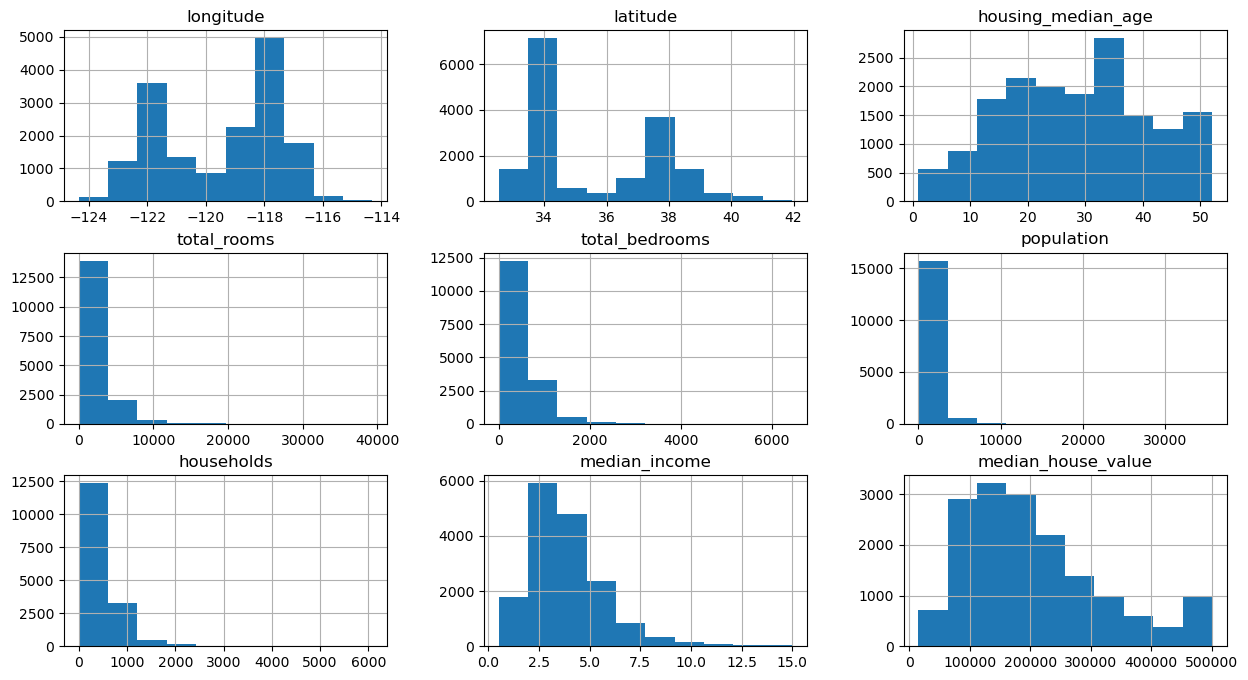

In [18]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

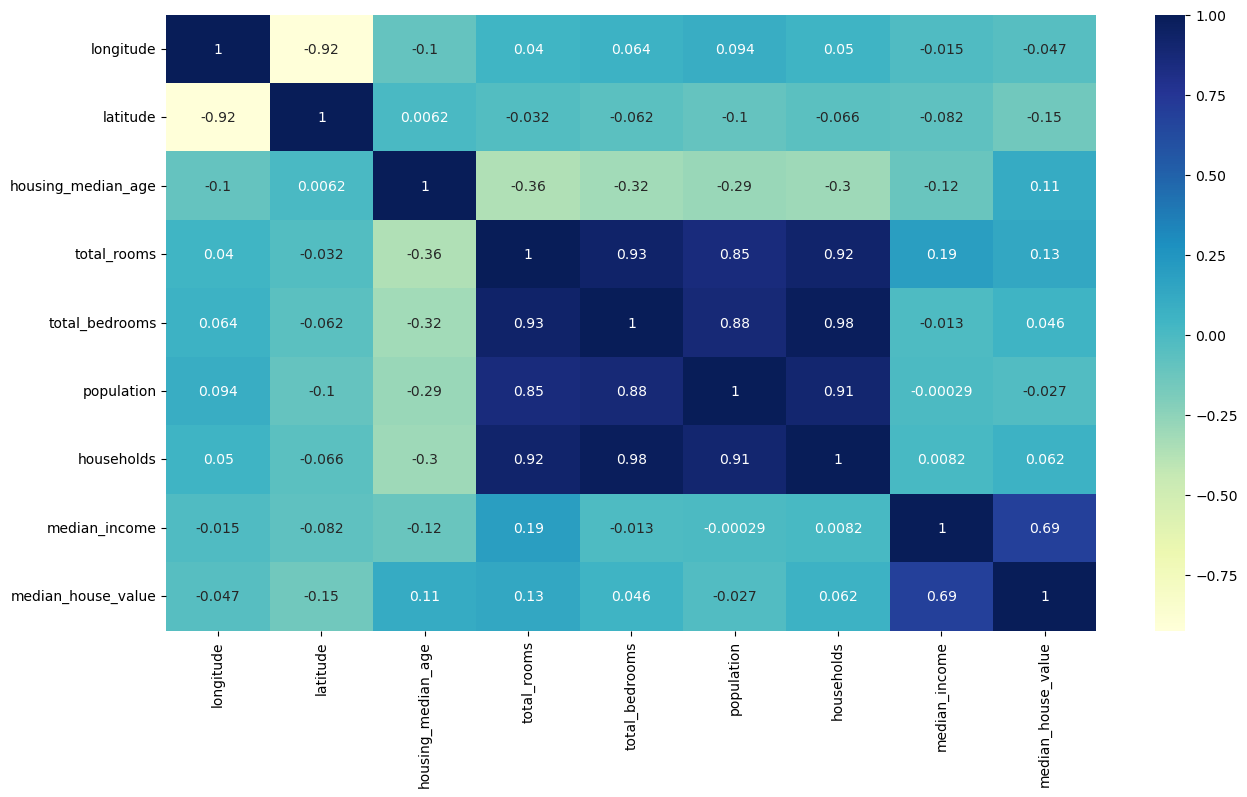

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [20]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

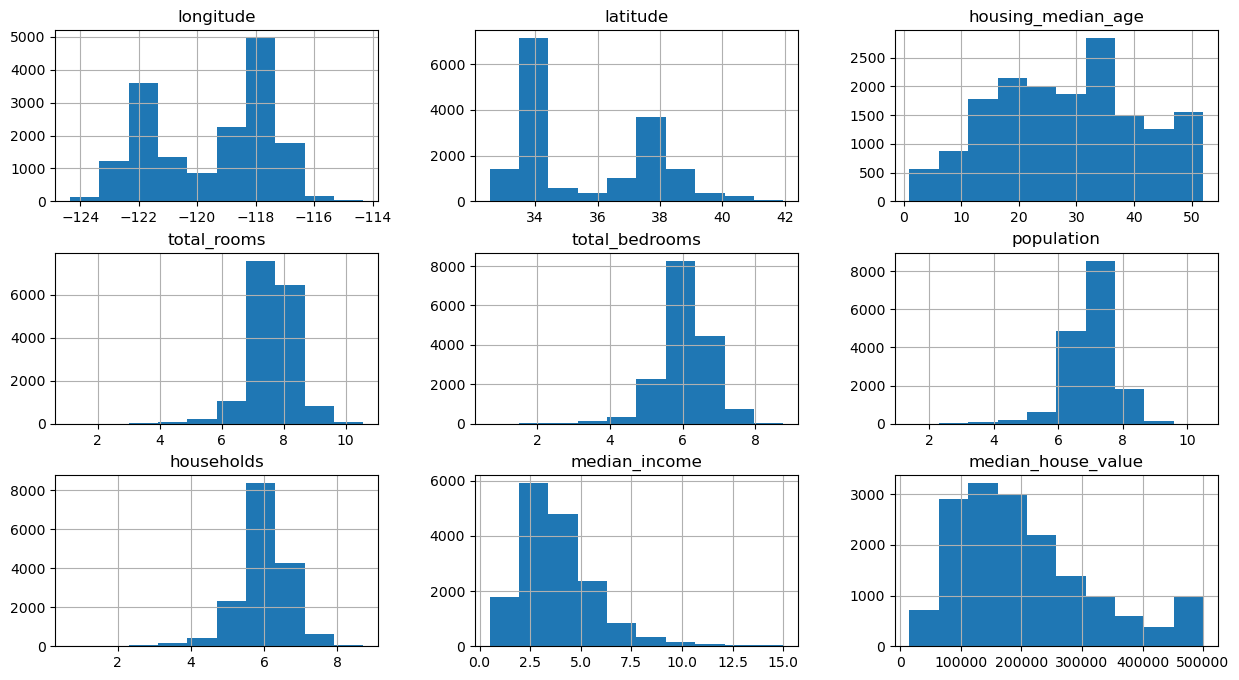

In [22]:
train_data.hist(figsize=(15,8))

### One hot encode the ocean proximity column to binary features

In [23]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7238
INLAND        5245
NEAR OCEAN    2070
NEAR BAY      1789
ISLAND           4
Name: ocean_proximity, dtype: int64

In [35]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [36]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13412,-117.48,34.08,28.0,7.561642,5.948035,7.356280,5.831882,3.9150,117400.0,0,1,0,0,0
13165,-121.37,36.84,11.0,7.599401,5.948035,6.931472,5.883322,3.5714,243000.0,0,1,0,0,0
14214,-117.06,32.68,41.0,7.888335,6.246107,7.417580,6.240276,2.3750,113500.0,0,0,0,0,1
14007,-117.18,32.75,52.0,7.316548,5.342334,6.251904,5.283204,8.6030,459600.0,0,0,0,0,1
2622,-124.10,40.95,17.0,7.303843,5.846439,6.714171,5.758902,1.8993,78400.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,-118.35,33.98,47.0,7.829233,6.135565,6.987490,6.056784,3.8235,207600.0,1,0,0,0,0
5204,-118.29,33.93,43.0,7.611842,5.940171,6.958448,5.866468,3.3836,129900.0,1,0,0,0,0
4542,-118.20,34.03,52.0,6.369901,5.062595,6.594413,5.164786,1.4115,140600.0,1,0,0,0,0
12329,-116.50,33.95,10.0,8.888757,7.540622,8.360539,7.391415,1.6983,66600.0,0,1,0,0,0


#### Correlate the new features to the target feature 'median house value'

<AxesSubplot:>

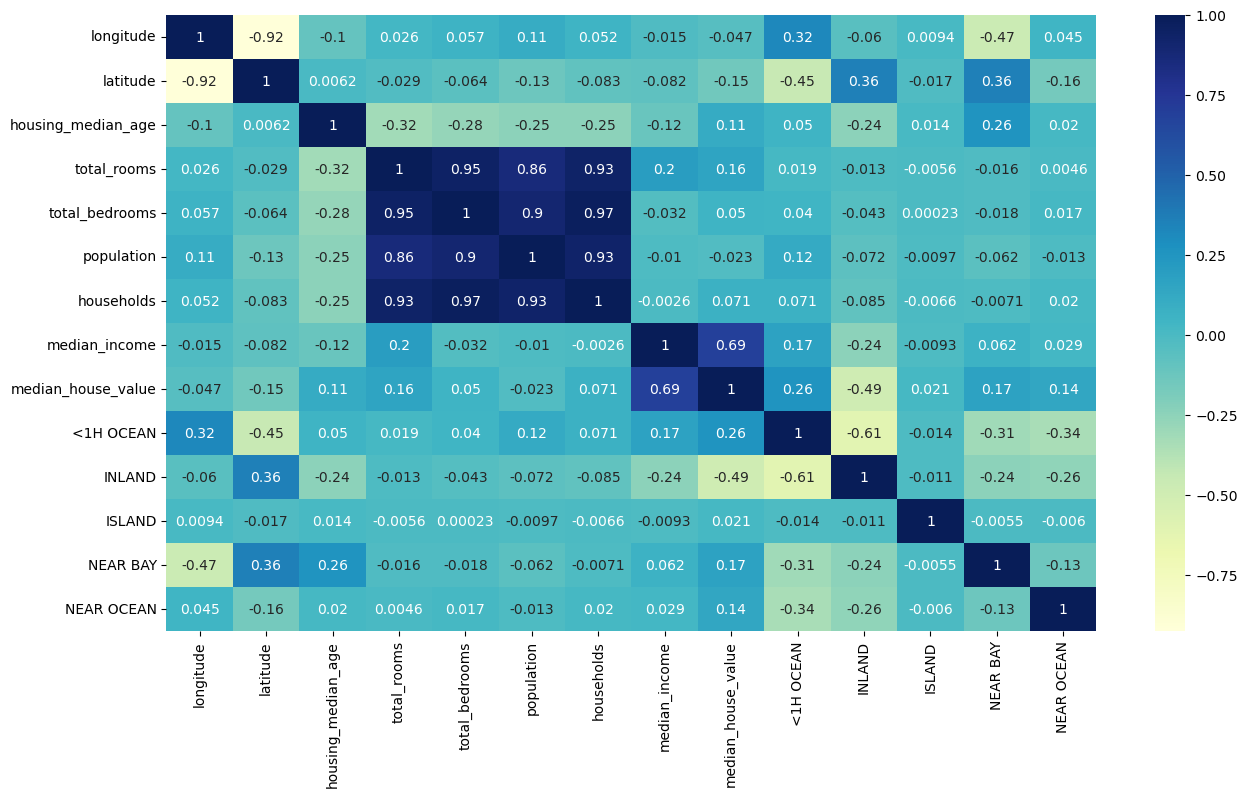

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

#### Feature engineering for the number of bedrooms from the total rooms per household

In [39]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_ratio'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

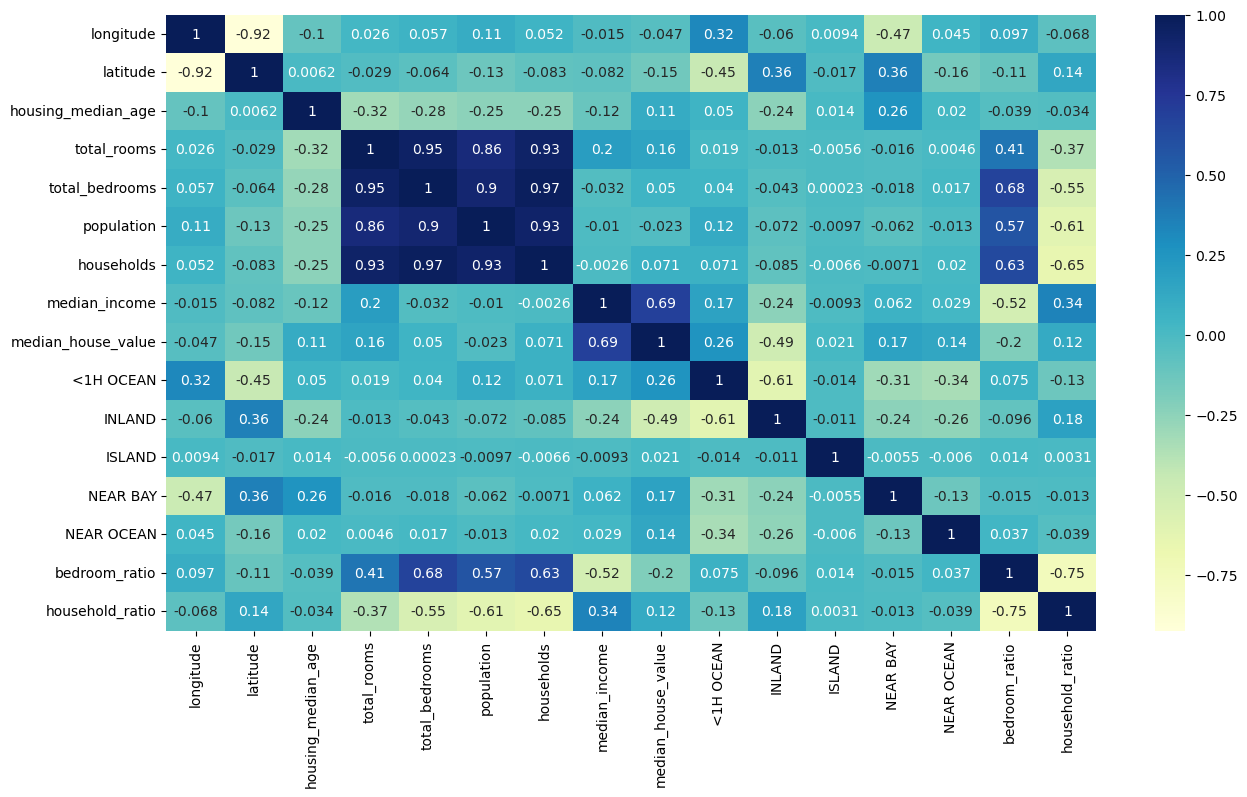

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [47]:
test_data= X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_ratio'] = test_data['total_rooms'] / test_data['households']

In [48]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [49]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_ratio
11432,-117.96,33.66,19.0,8.687105,6.613384,7.741968,6.593045,7.5699,333300.0,1,0,0,0,0,0.761287,1.317617
11918,-117.41,33.95,37.0,7.288244,5.552960,6.745236,5.662960,3.0542,123900.0,0,1,0,0,0,0.761906,1.287003
4798,-118.35,34.03,42.0,7.622664,6.240276,7.399398,6.218600,1.9928,125400.0,1,0,0,0,0,0.818648,1.225785
7314,-118.19,33.97,30.0,7.490529,6.322565,7.510978,6.255750,1.7562,181300.0,1,0,0,0,0,0.844075,1.197383
14879,-117.07,32.63,37.0,7.742402,5.940171,6.934397,5.880533,3.4550,156900.0,0,0,0,0,1,0.767226,1.316616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-122.24,37.79,39.0,7.293018,6.068426,7.289611,5.966147,2.1638,105500.0,0,0,0,1,0,0.832087,1.222400
9896,-122.26,38.29,10.0,6.877296,5.081404,6.180017,5.198497,6.5799,218100.0,0,0,0,1,0,0.738867,1.322939
210,-122.22,37.79,44.0,7.305188,5.752573,6.869014,5.609472,3.5156,109500.0,0,0,0,1,0,0.787464,1.302295
14638,-117.19,32.79,36.0,7.323171,5.556828,6.501290,5.631212,3.8571,235100.0,0,0,0,0,1,0.758801,1.300461


In [50]:
reg.score(X_test, y_test)

0.6595040279578255

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
forest.score(X_test, y_test)

0.8096266802220917

In [ ]:
I would choose the Random forest as it score 80% whereas the linear regression scores 65%.
Random forest uses desision trees and it support non-linearity and colinerity better than 